In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv('/content/CarPrice_Assignment.csv')

In [45]:
print(data.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [46]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [47]:
print(data.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [48]:
data.dropna(inplace=True)

In [49]:
X = data.drop('price', axis=1)
y = data['price']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [51]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 52 to 153
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            164 non-null    int64  
 1   symboling         164 non-null    int64  
 2   CarName           164 non-null    object 
 3   fueltype          164 non-null    object 
 4   aspiration        164 non-null    object 
 5   doornumber        164 non-null    object 
 6   carbody           164 non-null    object 
 7   drivewheel        164 non-null    object 
 8   enginelocation    164 non-null    object 
 9   wheelbase         164 non-null    float64
 10  carlength         164 non-null    float64
 11  carwidth          164 non-null    float64
 12  carheight         164 non-null    float64
 13  curbweight        164 non-null    int64  
 14  enginetype        164 non-null    object 
 15  cylindernumber    164 non-null    object 
 16  enginesize        164 non-null    int64  
 

In [52]:
print(X_train["symboling"].value_counts())
print(X_test["symboling"].value_counts())

 0    57
 1    40
 2    25
 3    20
-1    19
-2     3
Name: symboling, dtype: int64
 1    14
 0    10
 3     7
 2     7
-1     3
Name: symboling, dtype: int64


In [53]:
X_train = X_train[X_train["symboling"].apply(lambda x: type(x) == float)]
X_test = X_test[X_test["symboling"].apply(lambda x: type(x) == float)]

In [54]:
print(X_train.shape)
print(X_test.shape)

(0, 25)
(0, 25)


In [60]:
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)


LinearRegression()

In [61]:
y_pred_linear = linear_reg.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression - MSE: {:.2f}, R-squared: {:.2f}".format(mse_linear, r2_linear))

Linear Regression - MSE: 85409438362254457257524497219584.00, R-squared: -1081898760799790896775168.00


In [62]:
poly_features = PolynomialFeatures(degree=2)  # You can change the degree as needed
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

In [63]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [64]:
y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression (Degree=2) - MSE: {:.2f}, R-squared: {:.2f}".format(mse_poly, r2_poly))

Polynomial Regression (Degree=2) - MSE: 80908258.31, R-squared: -0.02


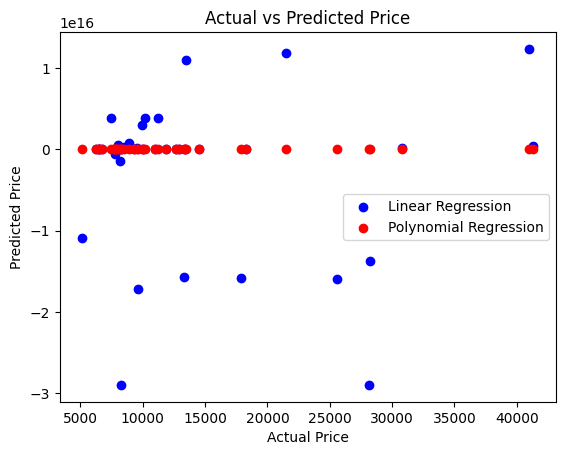

In [72]:
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_poly, color='red', label='Polynomial Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()